# Investigating Zillow Housing Prices with Kaggle Housing Prices Dataset for residential homes in Ames, Iowa

## Import Libraries

In [1]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Import Data

#### Remove irrelevant variables

In [2]:
df = pd.read_csv("C:/Users/apmey/OneDrive/Desktop/house-prices-advanced-regression-techniques/train.csv")

### Data Transformations

In [3]:
df = df.sample(frac = 1)
df["bathrooms"] = df["FullBath"] + df["HalfBath"] + df["BsmtFullBath"] + df["BsmtHalfBath"]
house_features = ["SalePrice", "LotArea", "YearBuilt", "bathrooms", "GrLivArea", "TotRmsAbvGrd", "Heating", "CentralAir", "Fireplaces", "GarageType","GarageCars", "RoofMatl", "Exterior1st", "HouseStyle"]
df = df[house_features]
df = pd.get_dummies(data=df, drop_first=True)

train = df[:1022] # 70%
validation = df[1022:] # 30%

In [4]:
train

,SalePrice,LotArea,YearBuilt,bathrooms,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
943,143000,25000,1967,2,1632,8,0,2,1,0,...,0,0,0,0,1,0,0,0,0,0
1050,176485,8993,2007,2,1302,6,0,2,1,0,...,1,0,0,0,1,0,0,0,0,0
1005,149900,8385,1977,2,985,6,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,140000,9550,1915,2,1717,7,1,3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,181500,9600,1976,3,1262,6,1,2,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,122500,11340,1885,2,2290,11,0,2,1,0,...,1,0,0,0,0,0,0,1,0,0
1242,170000,10625,1974,3,1173,6,2,2,1,0,...,0,0,0,0,0,0,0,0,1,0
874,66500,5720,1941,2,1131,5,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1441,149300,4426,2004,2,848,3,1,2,1,0,...,1,0,0,0,1,0,0,0,0,0


- Here are some common descriptions that buyers are given on zillow when looking at houses. Using these variables and the dataset from Kaggle, I am investigating how accurate these variables are when predicting the Sales Price, or Zillow Zestimate Price.
----------------------------------------------------

##### Variable ----------------------------- Kaggle Var
- Sale Price Estimate --------- SalePrice
---------------------------------------------------
- bedrooms -------------------- TotRmsAbvGrd
- bathrooms ------------------- BsmtFullBath+BsmtHalfBath+FullBath+HalfBath
- sqft ------------------------ GrLivArea
- Year Built ------------------ YearBuilt
- Heating --------------------- Heating               
- Cooling --------------------- CentralAir
- Lot (Lot size in Acres) ----- LotArea
- fireplace (Y/N) ------------- Fireplaces: Number of fireplaces
- Garage Type ----------------- GarageType: Garage location
- Parking Spaces -------------- GarageCars: Size of garage in car capacity
- Roof Material --------------- RoofMatl: Roof material
- Construction Materials ------ Exterior1st: Exterior covering on house
- Stories --------------------- HouseStyle

# Exploratory Data Analysis

In [5]:
# house_features = ["LotArea", "YearBuilt", "GrLivArea", "TotRmsAbvGrd", "Heating", "CentralAir", "Fireplaces", "GarageType","GarageCars", "RoofMatl", "Exterior1st", "HouseStyle"]

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 943 to 1110
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   SalePrice            1022 non-null   int64
 1   LotArea              1022 non-null   int64
 2   YearBuilt            1022 non-null   int64
 3   bathrooms            1022 non-null   int64
 4   GrLivArea            1022 non-null   int64
 5   TotRmsAbvGrd         1022 non-null   int64
 6   Fireplaces           1022 non-null   int64
 7   GarageCars           1022 non-null   int64
 8   Heating_GasA         1022 non-null   uint8
 9   Heating_GasW         1022 non-null   uint8
 10  Heating_Grav         1022 non-null   uint8
 11  Heating_OthW         1022 non-null   uint8
 12  Heating_Wall         1022 non-null   uint8
 13  CentralAir_Y         1022 non-null   uint8
 14  GarageType_Attchd    1022 non-null   uint8
 15  GarageType_Basment   1022 non-null   uint8
 16  GarageType_BuiltIn   1

In [7]:
train.describe()

,SalePrice,LotArea,YearBuilt,bathrooms,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
count,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,...,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,181413.797456,10326.658513,1970.708415,2.432485,1514.317025,6.531311,0.599804,1.774951,0.977495,0.011742,...,0.349315,0.146771,0.016634,0.008806,0.512720,0.006849,0.009785,0.298434,0.022505,0.043053
std,79154.139609,9531.429889,30.722018,0.918224,516.518193,1.617273,0.631619,0.739430,0.148391,0.107774,...,0.476987,0.354051,0.127959,0.093473,0.500083,0.082517,0.098481,0.457795,0.148391,0.203075
min,34900.000000,1300.000000,1872.000000,1.000000,334.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,129925.000000,7536.250000,1953.000000,2.000000,1141.250000,5.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,164800.000000,9423.000000,1972.000000,2.000000,1471.500000,6.000000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,213875.000000,11425.750000,2000.000000,3.000000,1786.000000,7.000000,1.000000,2.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,745000.000000,215245.000000,2010.000000,6.000000,4676.000000,14.000000,3.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
train.isna().sum()

SalePrice              0
LotArea                0
YearBuilt              0
bathrooms              0
GrLivArea              0
TotRmsAbvGrd           0
Fireplaces             0
GarageCars             0
Heating_GasA           0
Heating_GasW           0
Heating_Grav           0
Heating_OthW           0
Heating_Wall           0
CentralAir_Y           0
GarageType_Attchd      0
GarageType_Basment     0
GarageType_BuiltIn     0
GarageType_CarPort     0
GarageType_Detchd      0
RoofMatl_CompShg       0
RoofMatl_Membran       0
RoofMatl_Metal         0
RoofMatl_Roll          0
RoofMatl_Tar&Grv       0
RoofMatl_WdShake       0
RoofMatl_WdShngl       0
Exterior1st_AsphShn    0
Exterior1st_BrkComm    0
Exterior1st_BrkFace    0
Exterior1st_CBlock     0
Exterior1st_CemntBd    0
Exterior1st_HdBoard    0
Exterior1st_ImStucc    0
Exterior1st_MetalSd    0
Exterior1st_Plywood    0
Exterior1st_Stone      0
Exterior1st_Stucco     0
Exterior1st_VinylSd    0
Exterior1st_Wd Sdng    0
Exterior1st_WdShing    0


In [9]:
#sns.pairplot(train)

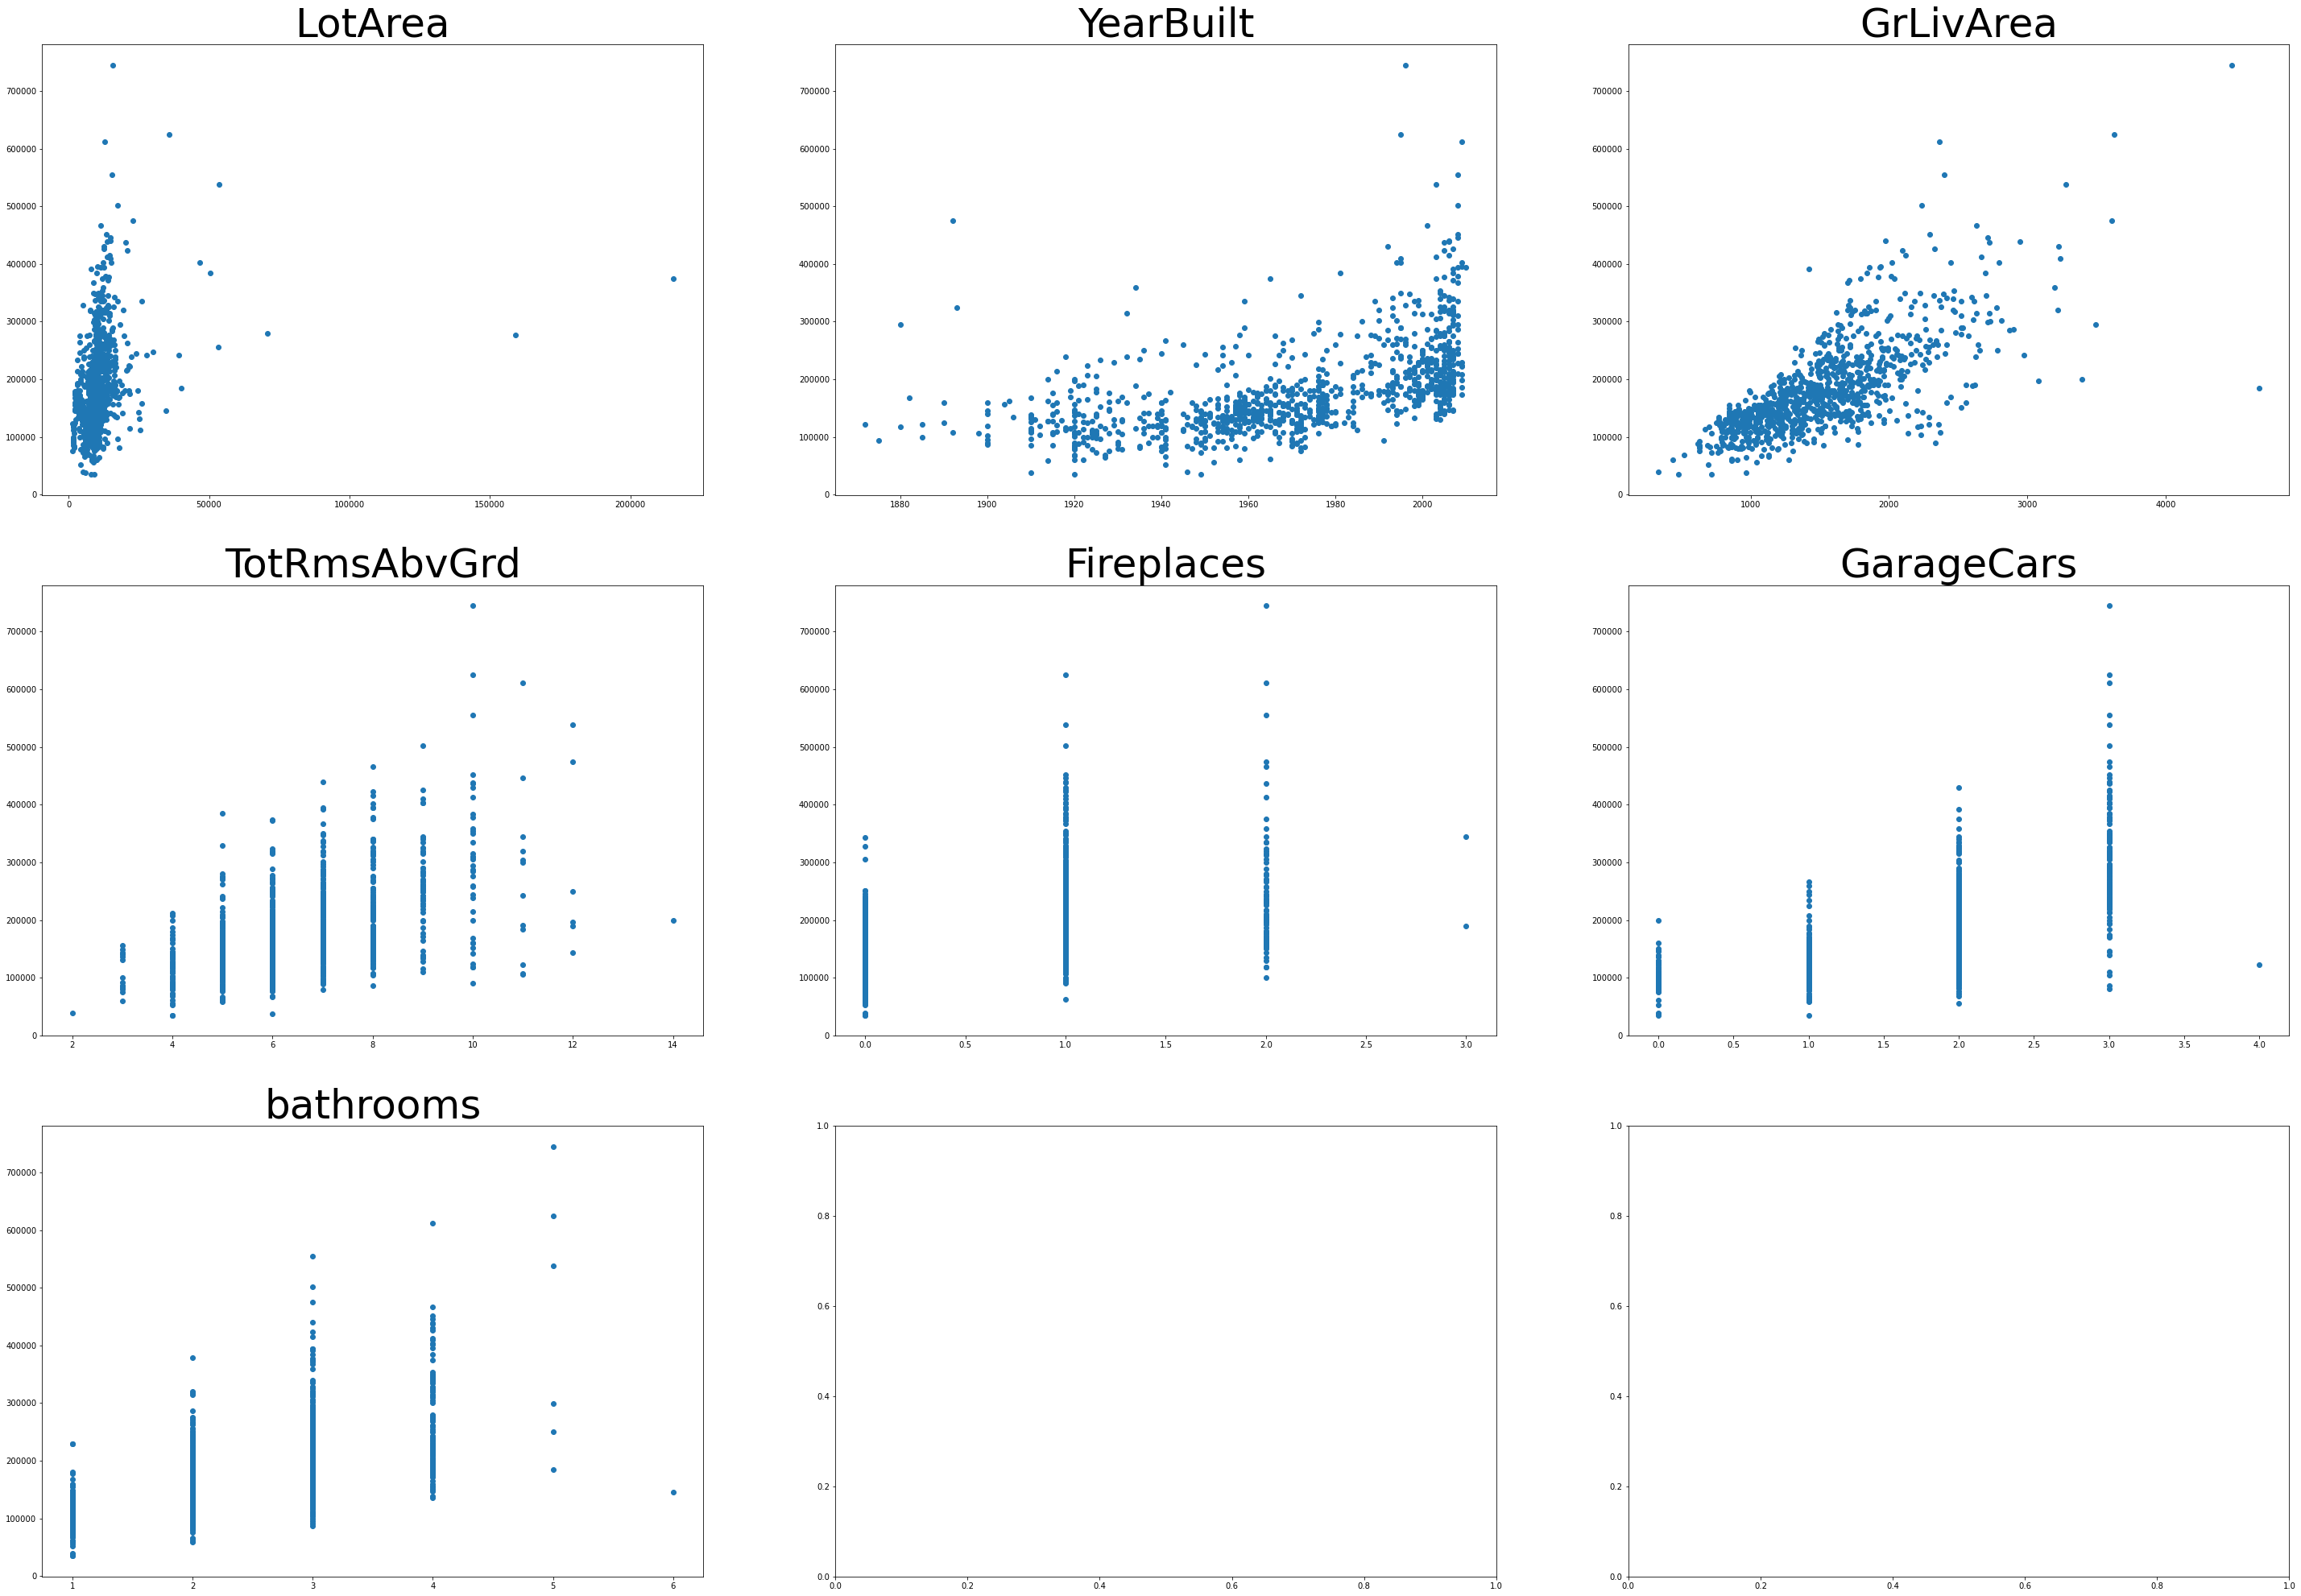

In [10]:
numerical = ["LotArea", "YearBuilt", "GrLivArea", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "bathrooms"]

# Extract the features and target variable from the train and test datasets
X = train[numerical]
Y = train["SalePrice"]

# Create a figure with 13 subplots
fig, axs = plt.subplots(3, 3, figsize=(50, 35))


# Iterate over the features and plot each one in a separate subplot
for i, feature in enumerate(numerical):
    row = i // 3
    col = i % 3
    axs[row, col].scatter(X[feature], Y)
    axs[row, col].set_title(feature, fontsize=50)

# Display the figure
plt.show()

# Hypothesis

Ho : Information on Zillow in not enough to decide the price of a home

Ha : Information on Zillow is enough to decide the price of a home

# Model Making

In [11]:
model = sm.OLS(Y, X).fit()

In [12]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              2766.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):                        0.00
Time:                        11:02:56   Log-Likelihood:                         -12381.
No. Observations:                1022   AIC:                                  2.478e+04
Df Residuals:                    1015   BIC:                                  2.481e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

### Model with categorical variables

In [13]:
Y = train["SalePrice"]
X = train.iloc[:, 1:]
# X_test = test[house_features]

In [14]:
X.head()

,LotArea,YearBuilt,bathrooms,GrLivArea,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,Heating_Grav,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
943,25000,1967,2,1632,8,0,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1050,8993,2007,2,1302,6,0,2,1,0,0,...,1,0,0,0,1,0,0,0,0,0
1005,8385,1977,2,985,6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,9550,1915,2,1717,7,1,3,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,9600,1976,3,1262,6,1,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
model2 = sm.OLS(Y, X).fit()

In [16]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     79.77
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          1.95e-286
Time:                        11:02:56   Log-Likelihood:                -12208.
No. Observations:                1022   AIC:                         2.450e+04
Df Residuals:                     978   BIC:                         2.472e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
LotArea                 0.6143    

- Additional Variables does not increase the Adjusted R Squared

# Test on validation dataset

In [17]:
from sklearn.metrics import mean_absolute_error

In [18]:
validation.iloc[:, 1:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 1273 to 629
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   LotArea              438 non-null    int64
 1   YearBuilt            438 non-null    int64
 2   bathrooms            438 non-null    int64
 3   GrLivArea            438 non-null    int64
 4   TotRmsAbvGrd         438 non-null    int64
 5   Fireplaces           438 non-null    int64
 6   GarageCars           438 non-null    int64
 7   Heating_GasA         438 non-null    uint8
 8   Heating_GasW         438 non-null    uint8
 9   Heating_Grav         438 non-null    uint8
 10  Heating_OthW         438 non-null    uint8
 11  Heating_Wall         438 non-null    uint8
 12  CentralAir_Y         438 non-null    uint8
 13  GarageType_Attchd    438 non-null    uint8
 14  GarageType_Basment   438 non-null    uint8
 15  GarageType_BuiltIn   438 non-null    uint8
 16  GarageType_CarPort   43

In [19]:
Y_val = validation["SalePrice"]
X_val = validation.iloc[:, 1:]

# Predict prices using the model
predicted_prices = model.predict(X_val[numerical])

# Calculate the mean absolute error
mae1 = mean_absolute_error(Y_val, predicted_prices)

print(f"Mean absolute error of Model 1: ${mae1:.2f}")

# Predict prices using the model
predicted_prices = model2.predict(X_val)

# Calculate the mean absolute error
mae2 = mean_absolute_error(Y_val, predicted_prices)

print(f"Mean absolute error of Model 2: ${mae2:.2f}")
if mae1 > mae2:
    print("Based on the MAE of the models, model 2 is closer to predicting the actual price than model 1. Additionally, these variables that are commonly found on Zillow are not enough to predict the the Sale Price of the house.")
else:
    print("Based on the MAE of the models, model 1 is closer to predicting the actual price than model 2. Additionally, these variables that are commonly found on Zillow are not enough to predict the the Sale Price of the house. ")

Mean absolute error of Model 1: $34117.84
Mean absolute error of Model 2: $35092.66
Based on the MAE of the models, model 1 is closer to predicting the actual price than model 2. Additionally, these variables that are commonly found on Zillow are not enough to predict the the Sale Price of the house. 


## Test on Home in Dataset

### The Price of the House with Id '973' in the dataset is $99,500

In [20]:
TPrice = 99550

In [21]:
T = {'LotArea' : [7892],
     'YearBuilt' : [1979],
     'GrLivArea' : [918], 
     'bathrooms' : [2],
     'TotRmsAbvGrd' : [5],
     'Fireplaces' : [1], 
     'GarageCars' : [1],
     'Heating_GasA' : [1],
     'Heating_GasW' : [0],
     'Heating_Grav' : [0],
     'Heating_OthW' : [0],
     'Heating_Wall' : [0],
     'CentralAir_Y' : [1],
     'GarageType_Attchd' : [1],
     'GarageType_Basment': [0],
     'GarageType_BuiltIn' : [0],  
     'GarageType_CarPort': [0],
     'GarageType_Detchd': [0],
     'RoofMatl_CompShg': [1],
     'RoofMatl_Membran': [0],
     'RoofMatl_Metal': [0],
     'RoofMatl_Roll': [0],
     'RoofMatl_Tar&Grv': [0],
     'RoofMatl_WdShake': [0],
     'RoofMatl_WdShngl': [0],
     'Exterior1st_AsphShn': [0],
     'Exterior1st_BrkComm': [0],
     'Exterior1st_BrkFace': [0],
     'Exterior1st_CBlock': [0],
     'Exterior1st_CemntBd': [0],
     'Exterior1st_HdBoard': [0],
     'Exterior1st_ImStucc': [0],
     'Exterior1st_MetalSd': [0],
     'Exterior1st_Plywood': [0],
     'Exterior1st_Stone': [0],
     'Exterior1st_Stucco': [0],
     'Exterior1st_VinylSd': [1],
     'Exterior1st_Wd Sdng': [0],
     'Exterior1st_WdShing': [0],
     'HouseStyle_1.5Unf': [0],
     'HouseStyle_1Story' : [0],
     'HouseStyle_2.5Fin' : [0],
     'HouseStyle_2.5Unf' : [0],
     'HouseStyle_2Story' : [0],
     'HouseStyle_SFoyer' : [0],
     'HouseStyle_SLvl' : [0]}



In [22]:
T = pd.DataFrame(T)
T

,LotArea,YearBuilt,GrLivArea,bathrooms,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,Heating_Grav,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,7892,1979,918,2,5,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
print(T.shape)
print(X.shape)

(1, 46)
(1022, 46)


In [24]:
predicted_value = int(model.predict(T[numerical])[0])
difference = int(predicted_value - TPrice)
if difference > 0:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 1 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 1 is $119241, which is $19691 over value


In [25]:
predicted_value = int(model2.predict(T)[0])
difference = int(predicted_value - TPrice)
if difference > 0:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 2 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 2 is $6964125, which is $6864575 over value


## Test on Zillow Homes


#### Zillow Sale Price is \\$218,500

Information can be found at https://www.zillow.com/homedetails/1006-Kennedy-St-Ames-IA-50010/93952953_zpid/

In [26]:
T2Price = 218500

In [27]:
T2 = {'LotArea' : [2352],
     'YearBuilt' : [1976],
     'GrLivArea' : [1548], 
     'bathrooms' : [3],
     'TotRmsAbvGrd' : [3],
     'Fireplaces' : [1], 
     'GarageCars' : [2],
     'Heating_GasA' : [1],
     'Heating_GasW' : [0],
     'Heating_Grav' : [0],
     'Heating_OthW' : [0],
     'Heating_Wall' : [0],
     'CentralAir_Y' : [1],
     'GarageType_Attchd' : [0],
     'GarageType_Basment': [0],
     'GarageType_BuiltIn' : [0],  
     'GarageType_CarPort': [0],
     'GarageType_Detchd': [1],
     'RoofMatl_CompShg': [1],
     'RoofMatl_Membran': [0],
     'RoofMatl_Metal': [0],
     'RoofMatl_Roll': [0],
     'RoofMatl_Tar&Grv': [0],
     'RoofMatl_WdShake': [0],
     'RoofMatl_WdShngl': [0],
     'Exterior1st_AsphShn': [0],
     'Exterior1st_BrkComm': [0],
     'Exterior1st_BrkFace': [0],
     'Exterior1st_CBlock': [0],
     'Exterior1st_CemntBd': [0],
     'Exterior1st_HdBoard': [0],
     'Exterior1st_ImStucc': [0],
     'Exterior1st_MetalSd': [0],
     'Exterior1st_Plywood': [0],
     'Exterior1st_Stone': [0],
     'Exterior1st_Stucco': [0],
     'Exterior1st_VinylSd': [0],
     'Exterior1st_Wd Sdng': [1],
     'Exterior1st_WdShing': [0],
     'HouseStyle_1.5Unf': [0],
     'HouseStyle_1Story' : [0],
     'HouseStyle_2.5Fin' : [0],
     'HouseStyle_2.5Unf' : [0],
     'HouseStyle_2Story' : [1],
     'HouseStyle_SFoyer' : [0],
     'HouseStyle_SLvl' : [0]}

In [28]:
T2 = pd.DataFrame(T2)
T2

,LotArea,YearBuilt,GrLivArea,bathrooms,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,Heating_Grav,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,2352,1976,1548,3,3,1,2,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
predicted_value = int(model.predict(T2[numerical])[0])
difference = int(predicted_value - T2Price)
if difference > 0:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 1 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 1 is $224161, which is $5661 over value


In [30]:
predicted_value = int(model2.predict(T2)[0])
difference = int(predicted_value - T2Price)
if difference > 0:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 2 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 2 is $11744212, which is $11525712 over value


## Zillow test number 2

#### Zillow Sale Price is \\$384,900

Information can be found at https://www.zillow.com/homedetails/1611-Ledges-Dr-Ames-IA-50010/307088542_zpid/

In [31]:
T3Price = 384900

In [32]:
T3 = {'LotArea' : [10018],
     'YearBuilt' : [2020],
     'GrLivArea' : [1337],
     'bathrooms' : [2],
     'TotRmsAbvGrd' : [3],
     'Fireplaces' : [1], 
     'GarageCars' : [3],
     'Heating_GasA' : [1],
     'Heating_GasW' : [0],
     'Heating_Grav' : [0],
     'Heating_OthW' : [0],
     'Heating_Wall' : [0],
     'CentralAir_Y' : [1],
     'GarageType_Attchd' : [1],
     'GarageType_Basment': [0],
     'GarageType_BuiltIn' : [0],  
     'GarageType_CarPort': [0],
     'GarageType_Detchd': [0],
     'RoofMatl_CompShg': [1],
     'RoofMatl_Membran': [0],
     'RoofMatl_Metal': [0],
     'RoofMatl_Roll': [0],
     'RoofMatl_Tar&Grv': [0],
     'RoofMatl_WdShake': [0],
     'RoofMatl_WdShngl': [0],
     'Exterior1st_AsphShn': [0],
     'Exterior1st_BrkComm': [0],
     'Exterior1st_BrkFace': [0],
     'Exterior1st_CBlock': [0],
     'Exterior1st_CemntBd': [0],
     'Exterior1st_HdBoard': [0],
     'Exterior1st_ImStucc': [0],
     'Exterior1st_MetalSd': [0],
     'Exterior1st_Plywood': [0],
     'Exterior1st_Stone': [0],
     'Exterior1st_Stucco': [0],
     'Exterior1st_VinylSd': [1],
     'Exterior1st_Wd Sdng': [0],
     'Exterior1st_WdShing': [0],
     'HouseStyle_1.5Unf': [0],
     'HouseStyle_1Story' : [1],
     'HouseStyle_2.5Fin' : [0],
     'HouseStyle_2.5Unf' : [0],
     'HouseStyle_2Story' : [0],
     'HouseStyle_SFoyer' : [0],
     'HouseStyle_SLvl' : [0]}

In [33]:
T3 = pd.DataFrame(T3)
T3

,LotArea,YearBuilt,GrLivArea,bathrooms,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,Heating_Grav,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,10018,2020,1337,2,3,1,3,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [34]:
predicted_value = int(model.predict(T3[numerical])[0])
difference = int(predicted_value - T3Price)
if difference > 0:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 1 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 1 is $234071, which is $150829 under value


In [35]:
predicted_value = int(model2.predict(T3)[0])
difference = int(predicted_value - T3Price)
if difference > 0:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 2 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 2 is $10229123, which is $9844223 over value


## Zillow test number 3

#### Zillow Sale Price is \\$285,000

Information can be found at https://www.zillow.com/homedetails/2816-Ontario-St-Ames-IA-50014/93959825_zpid/

In [36]:
T4Price = 28500

In [37]:
T4 = {'LotArea' : [16117],
     'YearBuilt' : [1963],
     'GrLivArea' : [2065], 
     'bathrooms' : [3],
     'TotRmsAbvGrd' : [4],
     'Fireplaces' : [1], 
     'GarageCars' : [2],
     'Heating_GasA' : [1],
     'Heating_GasW' : [0],
     'Heating_Grav' : [0],
     'Heating_OthW' : [0],
     'Heating_Wall' : [0],
     'CentralAir_Y' : [1],
     'GarageType_Attchd' : [1],
     'GarageType_Basment': [0],
     'GarageType_BuiltIn' : [0],  
     'GarageType_CarPort': [0],
     'GarageType_Detchd': [0],
     'RoofMatl_CompShg': [1],
     'RoofMatl_Membran': [0],
     'RoofMatl_Metal': [0],
     'RoofMatl_Roll': [0],
     'RoofMatl_Tar&Grv': [0],
     'RoofMatl_WdShake': [0],
     'RoofMatl_WdShngl': [0],
     'Exterior1st_AsphShn': [0],
     'Exterior1st_BrkComm': [0],
     'Exterior1st_BrkFace': [0],
     'Exterior1st_CBlock': [0],
     'Exterior1st_CemntBd': [0],
     'Exterior1st_HdBoard': [0],
     'Exterior1st_ImStucc': [0],
     'Exterior1st_MetalSd': [0],
     'Exterior1st_Plywood': [0],
     'Exterior1st_Stone': [0],
     'Exterior1st_Stucco': [0],
     'Exterior1st_VinylSd': [0],
     'Exterior1st_Wd Sdng': [0],
     'Exterior1st_WdShing': [0],
     'HouseStyle_1.5Unf': [0],
     'HouseStyle_1Story' : [1],
     'HouseStyle_2.5Fin' : [0],
     'HouseStyle_2.5Unf' : [0],
     'HouseStyle_2Story' : [0],
     'HouseStyle_SFoyer' : [0],
     'HouseStyle_SLvl' : [0]}

In [38]:
T4 = pd.DataFrame(T4)
T4

,LotArea,YearBuilt,GrLivArea,bathrooms,TotRmsAbvGrd,Fireplaces,GarageCars,Heating_GasA,Heating_GasW,Heating_Grav,...,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,16117,1963,2065,3,4,1,2,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
predicted_value = int(model.predict(T4[numerical])[0])
difference = int(predicted_value - T4Price)
if difference > 0:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 1 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 1 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 1 is $265591, which is $237091 over value


In [40]:
predicted_value = int(model2.predict(T4)[0])
difference = int(predicted_value - T4Price)
if difference > 0:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${difference} over value")
elif difference == 0: 
    print(f"The predicted value using model 2 is ${predicted_value} and is correct")
else:
    print(f"The predicted value using model 2 is ${predicted_value}, which is ${-difference} under value")

The predicted value using model 2 is $15682251, which is $15653751 over value


### Based on these three samples from Zillow, we can not reject the null hypothesis that information on Zillow in not enough to decide the price of a home because half their predictions were more the \\$100,000 of from the sale price. Model 1 is more accurate in predicting the prices of the houses, but it is still far over the actual price.